<a href="https://colab.research.google.com/github/Sripsri/Elevate_labs/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.drop(['CustomerID' ],axis =1 ,inplace = True)  # droping customer id column because it is same as index no


In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


** Summary Statistics**
 - This gives you a quick overview of numerical columns (mean, min, max, etc.)

In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Check Data Types
- Make sure columns like age and income are integers. If needed, convert them like this



In [10]:
df.dtypes

,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


Check for Missing Values

In [11]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


 Remove Duplicates

In [12]:
df[df.duplicated()]   #no duplicate rows present

,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [13]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


 Average Age and Spending Score by Gender

In [14]:
df.groupby('Gender')[['Age', 'Spending Score (1-100)']].mean()

,Age,Spending Score (1-100)
Gender,,
Female,38.098214,51.526786
Male,39.806818,48.511364


orrelation between Age, Income, and Spending Score

In [15]:
df.corr(numeric_only=True) #This helps you see how strongly values are related.

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Visualize Gender Distribution

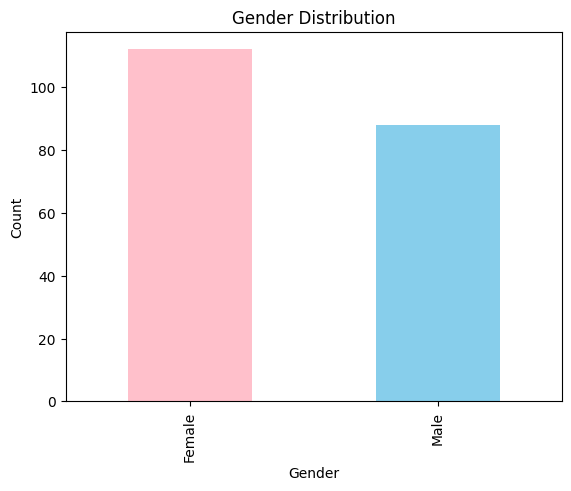

In [16]:
import matplotlib.pyplot as plt

df['Gender'].value_counts().plot(kind='bar', color=['pink', 'skyblue'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Scatter Plot – Income vs Spending Score

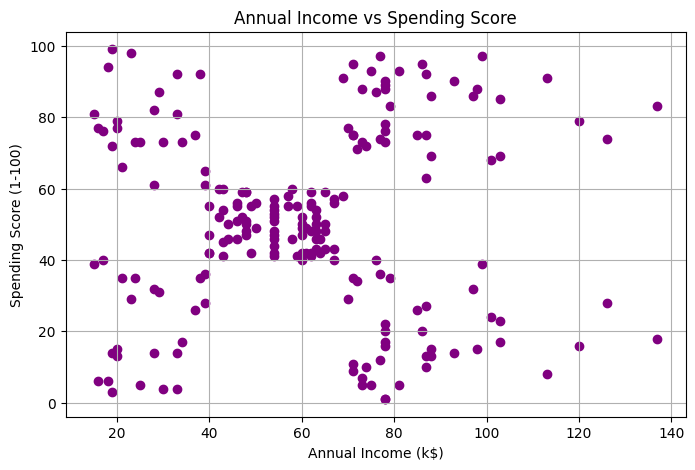

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='purple')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

Age Grouping

In [18]:
df['age_group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 70],
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'])

df.groupby('age_group')['Spending Score (1-100)'].mean()

<ipython-input-18-94a2dfabde26>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['Spending Score (1-100)'].mean()


,Spending Score (1-100)
age_group,
18-25,54.352941
26-35,64.450000
36-45,44.833333
46-55,36.702703
56+,38.379310


In [19]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'age_group'],
      dtype='object')

Simple Linear Regression

In [20]:
# Import ML Libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#  Select Features and Target
# We want to predict Spending Score based on Annual Income.


X = df[['Annual Income (k$)']]  # Feature
y = df['Spending Score (1-100)']  # Target

In [22]:
# Split Data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create and Train the Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
 #Predict and Evaluate the Model

y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 573.9517746657597
R² Score: -0.16363590679133844


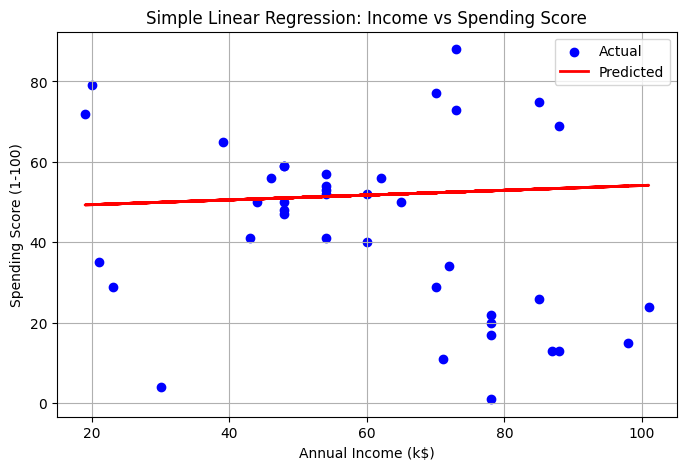

In [25]:
# Visualize the Regression Line

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation:
The red line is your prediction (regression line).

The closer your blue points (actual values) are to the red line, the better the model.

R² Score tells you how well the model explains the variation in data. Closer to 1 means better.